1/ Kiểm tra DataLoader

In [1]:
import torch
from src.data import get_loader

# Load DataLoader
train_loader, train_dataset = get_loader("data/train.en.gz", "data/train.fr.gz", batch_size=32, shuffle=False)

print(f"Dataset size: {len(train_dataset)}")
print(f"Vocab EN size: {len(train_dataset.src_vocab.stoi)}")
print(f"Vocab FR size: {len(train_dataset.trg_vocab.stoi)}")

# Kiểm tra batch đầu tiên
for src, trg in train_loader:
    print("SRC shape:", src.shape)  # [batch_size, seq_len]
    print("TRG shape:", trg.shape)
    print("SRC example:", src[0])
    print("TRG example:", trg[0])
    break


100%|██████████| 29000/29000 [00:00<00:00, 33017.40it/s]


Dataset size: 29000
Vocab EN size: 5893
Vocab FR size: 6470
SRC shape: torch.Size([32, 24])
TRG shape: torch.Size([32, 25])
SRC example: tensor([   1,   16,   24,   15,   25,  774,   17,   57,   80,  202, 1305,    5,
           2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])
TRG example: tensor([   1,   21,   81,   32,  214,   28,   88,   70,    7, 1171,    5,    2,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0])


Test việc lưu và load file vocab, train

In [2]:
from src.data import get_loader, save_vocab, save_dataset

# Load DataLoader + Dataset
train_loader, train_dataset = get_loader("data/train.en.gz", "data/train.fr.gz", batch_size=32)

# Lưu vocab và dataset
save_vocab(train_dataset.src_vocab, "data/vocab_en.pkl")
save_vocab(train_dataset.trg_vocab, "data/vocab_fr.pkl")
save_dataset(train_dataset, "data/train_dataset.pt")

print("✅ Vocab và dataset đã lưu xong.")


100%|██████████| 29000/29000 [00:00<00:00, 57629.19it/s]


✅ Vocab và dataset đã lưu xong.


In [3]:
from src.data import load_vocab, load_dataset

# Load lại vocab
src_vocab = load_vocab("data/vocab_en.pkl")
trg_vocab = load_vocab("data/vocab_fr.pkl")

print("Loaded EN vocab size:", len(src_vocab.stoi))
print("Loaded FR vocab size:", len(trg_vocab.stoi))

# Load dataset đã save
train_dataset = load_dataset("data/train_dataset.pt")
print("Loaded dataset size:", len(train_dataset))

Loaded EN vocab size: 5893
Loaded FR vocab size: 6470
Loaded dataset size: 29000


2/ Xem File vocab_en.pkl / vocab_fr.pkl

In [4]:
import pickle

# Load vocab
with open("data/vocab_en.pkl", "rb") as f:
    src_vocab = pickle.load(f)

with open("data/vocab_fr.pkl", "rb") as f:
    trg_vocab = pickle.load(f)

# Xem tổng số từ
print("EN vocab size:", len(src_vocab.stoi))
print("FR vocab size:", len(trg_vocab.stoi))

# In 10 từ đầu tiên trong vocab
print("EN sample:", list(src_vocab.stoi.items())[:10])
print("FR sample:", list(trg_vocab.stoi.items())[:10])


EN vocab size: 5893
FR vocab size: 6470
EN sample: [('<pad>', 0), ('<sos>', 1), ('<eos>', 2), ('<unk>', 3), ('a', 4), ('.', 5), ('in', 6), ('the', 7), ('on', 8), ('man', 9)]
FR sample: [('<pad>', 0), ('<sos>', 1), ('<eos>', 2), ('<unk>', 3), ('un', 4), ('.', 5), ('une', 6), ('de', 7), ('en', 8), ("d'", 9)]


In [19]:
NUM_SAMPLES = 5  # số câu muốn xem
for i in range(NUM_SAMPLES):
    src_idx, trg_idx = train_dataset[i]

    # Chuyển index -> từ
    src_words = [src_vocab.itos[idx.item()] for idx in src_idx if idx.item() not in [src_vocab.stoi["<pad>"]]]
    trg_words = [trg_vocab.itos[idx.item()] for idx in trg_idx if idx.item() not in [trg_vocab.stoi["<pad>"]]]

    print(f"Sample {i+1}:")
    print("EN:", " ".join(src_words))
    print("FR:", " ".join(trg_words))
    print("---")


Sample 1:
EN: <sos> two young , white males are outside near many bushes . <eos>
FR: <sos> deux jeunes hommes blancs sont dehors près de buissons . <eos>
---
Sample 2:
EN: <sos> several men in hard hats are operating a giant pulley system . <eos>
FR: <sos> plusieurs hommes en casque font fonctionner un système de poulies géant . <eos>
---
Sample 3:
EN: <sos> a little girl climbing into a wooden playhouse . <eos>
FR: <sos> une petite fille grimpe dans une maisonnette en bois . <eos>
---
Sample 4:
EN: <sos> a man in a blue shirt is standing on a ladder cleaning a window . <eos>
FR: <sos> un homme dans une chemise bleue se tient sur une échelle pour nettoyer une fenêtre . <eos>
---
Sample 5:
EN: <sos> two men are at the stove preparing food . <eos>
FR: <sos> deux hommes aux fourneaux préparent à manger . <eos>
---


2️⃣ Kiểm tra vocab và dataset

In [20]:
src_example, trg_example = train_dataset[0]
print("Source indices:", src_example)
print("Target indices:", trg_example)


Source indices: tensor([   1,   16,   24,   15,   25,  774,   17,   57,   80,  202, 1305,    5,
           2])
Target indices: tensor([   1,   21,   81,   32,  214,   28,   88,   70,    7, 1171,    5,    2])


In [21]:
src_words = [src_vocab.itos[idx.item()] for idx in src_example]
trg_words = [trg_vocab.itos[idx.item()] for idx in trg_example]
print("Source sentence:", " ".join(src_words))
print("Target sentence:", " ".join(trg_words))


Source sentence: <sos> two young , white males are outside near many bushes . <eos>
Target sentence: <sos> deux jeunes hommes blancs sont dehors près de buissons . <eos>


In [22]:
# Lấy một sample đầu tiên từ dataset
src_example, trg_example = train_dataset[0]

# In ra các index (số) trong câu
print("Source indices:", src_example)
print("Target indices:", trg_example)

# Chuyển các index về từ để đọc được
src_words = [src_vocab.itos[idx.item()] for idx in src_example]
trg_words = [trg_vocab.itos[idx.item()] for idx in trg_example]

print("Source sentence:", " ".join(src_words))
print("Target sentence:", " ".join(trg_words))


Source indices: tensor([   1,   16,   24,   15,   25,  774,   17,   57,   80,  202, 1305,    5,
           2])
Target indices: tensor([   1,   21,   81,   32,  214,   28,   88,   70,    7, 1171,    5,    2])
Source sentence: <sos> two young , white males are outside near many bushes . <eos>
Target sentence: <sos> deux jeunes hommes blancs sont dehors près de buissons . <eos>


3️⃣ Kiểm tra DataLoader

In [23]:
from torch.utils.data import DataLoader
from src.data import load_dataset, MyCollate, load_vocab

# Load dataset + vocab
train_dataset = load_dataset("data/train_dataset.pt")
src_vocab = load_vocab("data/vocab_en.pkl")
trg_vocab = load_vocab("data/vocab_fr.pkl")

PAD_IDX = src_vocab.stoi["<pad>"]

# Tạo DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,
                          collate_fn=MyCollate(PAD_IDX))

# Xem shape batch đầu tiên
for src_batch, trg_batch in train_loader:
    print(src_batch.shape, trg_batch.shape)
    break


torch.Size([32, 23]) torch.Size([32, 30])


src_batch.shape = [32, 23] → batch size = 32, sequence length nguồn = 23 token.

trg_batch.shape = [32, 25] → batch size = 32, sequence length đích = 25 token.

In [29]:
import gzip
from collections import Counter
import spacy

# Dùng spaCy để tokenize tiếng Anh
spacy_en = spacy.load("en_core_web_sm")

def tokenize_en(text):
    return [tok.text.lower() for tok in spacy_en.tokenizer(text)]

# ======= Đọc file train.en hoặc train.en.gz =======
file_path = "data/train.en.gz"

if file_path.endswith(".gz"):
    with gzip.open(file_path, mode="rt", encoding="utf-8") as f:
        lines = f.read().strip().split("\n")
else:
    with open(file_path, encoding="utf-8") as f:
        lines = f.read().strip().split("\n")

print(f"✅ Tổng số câu: {len(lines):,}")

# ======= Tokenize toàn bộ tập =======
tokenized_sentences = [tokenize_en(line) for line in lines]

# Đếm số từ trong từng câu
sentence_lengths = [len(sent) for sent in tokenized_sentences]

# Tổng hợp thống kê độ dài câu
avg_len = sum(sentence_lengths) / len(sentence_lengths)
max_len = max(sentence_lengths)
min_len = min(sentence_lengths)

print(f"📊 Độ dài câu:")
print(f"   Trung bình: {avg_len:.2f} từ / câu")
print(f"   Ngắn nhất:  {min_len} từ")
print(f"   Dài nhất:   {max_len} từ")

# ======= Thống kê từ vựng =======
word_freq = Counter([word for sent in tokenized_sentences for word in sent])

unique_words = len(word_freq)
print(f"🧠 Tổng số từ Tiếng anh khác nhau (unique words): {unique_words:,}")

# Hiển thị 20 từ phổ biến nhất
print("\n🔝 20 từ tiếng anh phổ biến nhất:")
for word, freq in word_freq.most_common(20):
    print(f"{word:10s} → {freq}")
rare_words = [w for w, f in word_freq.items() if f == 1]
print(f"Số từ chỉ xuất hiện 1 lần: {len(rare_words)}")
print(f"Tỷ lệ từ hiếm: {len(rare_words)/len(word_freq)*100:.2f}%")

✅ Tổng số câu: 29,000
📊 Độ dài câu:
   Trung bình: 13.11 từ / câu
   Ngắn nhất:  4 từ
   Dài nhất:   41 từ
🧠 Tổng số từ Tiếng anh khác nhau (unique words): 9,793

🔝 20 từ tiếng anh phổ biến nhất:
a          → 49165
.          → 27623
in         → 14886
the        → 10955
on         → 8035
man        → 7781
is         → 7525
and        → 7379
of         → 6871
with       → 6179
woman      → 3973
,          → 3963
two        → 3886
are        → 3717
to         → 3128
people     → 3122
at         → 2927
an         → 2861
wearing    → 2623
shirt      → 2324
Số từ chỉ xuất hiện 1 lần: 3904
Tỷ lệ từ hiếm: 39.87%


In [30]:
import gzip
from collections import Counter
import spacy

# Dùng spaCy để tokenize tiếng Anh
spacy_en = spacy.load("fr_core_news_sm")

def tokenize_en(text):
    return [tok.text.lower() for tok in spacy_en.tokenizer(text)]

# ======= Đọc file train.en hoặc train.en.gz =======
file_path = "data/train.fr.gz"

if file_path.endswith(".gz"):
    with gzip.open(file_path, mode="rt", encoding="utf-8") as f:
        lines = f.read().strip().split("\n")
else:
    with open(file_path, encoding="utf-8") as f:
        lines = f.read().strip().split("\n")

print(f"✅ Tổng số câu: {len(lines):,}")

# ======= Tokenize toàn bộ tập =======
tokenized_sentences = [tokenize_en(line) for line in lines]

# Đếm số từ trong từng câu
sentence_lengths = [len(sent) for sent in tokenized_sentences]

# Tổng hợp thống kê độ dài câu
avg_len = sum(sentence_lengths) / len(sentence_lengths)
max_len = max(sentence_lengths)
min_len = min(sentence_lengths)

print(f"📊 Độ dài câu:")
print(f"   Trung bình: {avg_len:.2f} từ / câu")
print(f"   Ngắn nhất:  {min_len} từ")
print(f"   Dài nhất:   {max_len} từ")

# ======= Thống kê từ vựng =======
word_freq = Counter([word for sent in tokenized_sentences for word in sent])

unique_words = len(word_freq)
print(f"🧠 Tổng số từ Tiếng pháp khác nhau (unique words): {unique_words:,}")

# Hiển thị 20 từ phổ biến nhất
print("\n🔝 20 từ tiếng pháp phổ biến nhất:")
for word, freq in word_freq.most_common(20):
    print(f"{word:10s} → {freq}")
rare_words = [w for w, f in word_freq.items() if f == 1]
print(f"Số từ chỉ xuất hiện 1 lần: {len(rare_words)}")
print(f"Tỷ lệ từ hiếm: {len(rare_words)/len(word_freq)*100:.2f}%")

✅ Tổng số câu: 29,000
📊 Độ dài câu:
   Trung bình: 14.28 từ / câu
   Ngắn nhất:  4 từ
   Dài nhất:   54 từ
🧠 Tổng số từ Tiếng pháp khác nhau (unique words): 11,149

🔝 20 từ tiếng pháp phổ biến nhất:
un         → 34942
.          → 27680
une        → 20624
de         → 14013
en         → 9866
d'         → 8139
dans       → 8059
sur        → 7957
homme      → 7887
et         → 7426
des        → 7406
avec       → 7177
la         → 5651
à          → 5326
,          → 4800
femme      → 4454
l'         → 4284
deux       → 4068
le         → 3699
est        → 3257
Số từ chỉ xuất hiện 1 lần: 4683
Tỷ lệ từ hiếm: 42.00%


4️⃣ Training

In [24]:
# %run src/train_data.py


In [25]:
# model.eval()
# with torch.no_grad():
#     for src, trg in train_loader:
#         src, trg = src.to(DEVICE), trg.to(DEVICE)
#         output = model(src, trg, teacher_forcing_ratio=0)
#         top_words = output.argmax(-1)
#         # print("Src:", src[0])
#         print("Pred:", top_words[0])
#         print("Trg:", trg[0])
#         break


5️⃣ Kiểm tra model sau training

In [26]:
# model.load_state_dict(torch.load("checkpoints/seq2seq_epoch10.pth"))
# model.eval()

# with torch.no_grad():
#     src_tensor = src_example.unsqueeze(0).to(DEVICE)
#     trg_tensor = trg_example.unsqueeze(0).to(DEVICE)
#     output = model(src_tensor, trg_tensor, teacher_forcing_ratio=0)
#     pred_indices = output.argmax(-1)[0].cpu().tolist()
#     pred_sentence = [trg_vocab.itos[idx] for idx in pred_indices]
#     print("Predicted sentence:", " ".join(pred_sentence))


6️⃣ Gợi ý cải tiến

1. Teacher forcing: hiện tại là cố định 0.5. Bạn có thể giảm dần theo epoch

2. Gradient clipping: tránh exploding gradients với LSTM:

3. Validation set: nếu có dataset validation, theo dõi val_loss sẽ tốt hơn.

In [27]:
# teacher_forcing_ratio = max(0.5 * (0.9 ** epoch), 0.1)
# torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)


Load checkpoint

In [28]:
# checkpoint_path = "checkpoints/seq2seq_epoch10.pth"
# model.load_state_dict(torch.load(checkpoint_path, map_location=DEVICE))
# model.eval()  # Chuyển model sang chế độ eval


In [ ]:
# ============================================
# 🧠 Mini Seq2Seq Translation Example
# ============================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch import tensor

# -----------------------------------------------------
# 1️⃣ Data
# -----------------------------------------------------
train_en = [
    "i am a student",
    "he is a teacher",
    "she is happy"
]

train_fr = [
    "je suis un étudiant",
    "il est un enseignant",
    "elle est heureuse"
]

# -----------------------------------------------------
# 2️⃣ Vocabulary
# -----------------------------------------------------
vocab_en = {
    "<pad>": 0, "<sos>": 1, "<eos>": 2, "<unk>": 3,
    "i": 4, "am": 5, "a": 6, "student": 7,
    "he": 8, "is": 9, "teacher": 10,
    "she": 11, "happy": 12
}

vocab_fr = {
    "<pad>": 0, "<sos>": 1, "<eos>": 2, "<unk>": 3,
    "je": 4, "suis": 5, "un": 6, "étudiant": 7,
    "il": 8, "est": 9, "enseignant": 10,
    "elle": 11, "heureuse": 12
}

def sentence_to_tensor(sentence, vocab):
    tokens = sentence.split()
    ids = [vocab["<sos>"]] + [vocab.get(tok, vocab["<unk>"]) for tok in tokens] + [vocab["<eos>"]]
    return tensor(ids)

pairs = [(sentence_to_tensor(e, vocab_en), sentence_to_tensor(f, vocab_fr))
         for e, f in zip(train_en, train_fr)]

# -----------------------------------------------------
# 3️⃣ Model
# -----------------------------------------------------
class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size, hidden_size)
    def forward(self, x):
        embedded = self.embedding(x)
        outputs, hidden = self.rnn(embedded)
        return hidden

class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size, hidden_size)
        self.fc = nn.Linear(hidden_size, vocab_size)
    def forward(self, x, hidden):
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded, hidden)
        pred = self.fc(output)
        return pred, hidden

# -----------------------------------------------------
# 4️⃣ Instantiate
# -----------------------------------------------------
embed_size, hidden_size = 32, 64
encoder = Encoder(len(vocab_en), embed_size, hidden_size)
decoder = Decoder(len(vocab_fr), embed_size, hidden_size)

criterion = nn.CrossEntropyLoss(ignore_index=vocab_fr["<pad>"])
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.01)

# -----------------------------------------------------
# 5️⃣ Training Loop
# -----------------------------------------------------
EPOCHS = 300
for epoch in range(EPOCHS):
    total_loss = 0
    for src, trg in pairs:
        optimizer.zero_grad()

        hidden = encoder(src.unsqueeze(1))  # (seq_len, batch=1)
        decoder_input = trg[:-1].unsqueeze(1)
        decoder_target = trg[1:]

        output, _ = decoder(decoder_input, hidden)
        output = output.squeeze(1)
        loss = criterion(output, decoder_target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS} | Loss: {total_loss:.4f}")

# -----------------------------------------------------
# 6️⃣ Test (greedy decoding)
# -----------------------------------------------------
def translate(sentence):
    with torch.no_grad():
        src = sentence_to_tensor(sentence, vocab_en)
        hidden = encoder(src.unsqueeze(1))

        input_token = tensor([[vocab_fr["<sos>"]]])
        result = []

        for _ in range(10):
            output, hidden = decoder(input_token, hidden)
            token = output.argmax(2)[0, 0].item()
            if token == vocab_fr["<eos>"]:
                break
            result.append(token)
            input_token = tensor([[token]])

        inv_vocab_fr = {v: k for k, v in vocab_fr.items()}
        translated = " ".join(inv_vocab_fr[t] for t in result)
        return translated

print("\n🧩 Translation Test:")
for s in train_en:
    print(f"{s} → {translate(s)}")


Epoch 50/300 | Loss: 0.0033
Epoch 100/300 | Loss: 0.0014
Epoch 150/300 | Loss: 0.0008
Epoch 200/300 | Loss: 0.0005
Epoch 250/300 | Loss: 0.0004
Epoch 300/300 | Loss: 0.0003

🧩 Translation Test:
i am a student → je suis un étudiant
he is a teacher → il est un enseignant
she is happy → elle est heureuse


In [6]:
# ============================================
# 🧠 DEMO: Kiểm tra Dataset và Vocab
# ============================================

import torch
from src.data import get_loader, save_vocab, load_vocab, save_dataset, load_dataset

# --------------------------------------------------
# 1️⃣ Load DataLoader (đọc từ file train.en.gz, train.fr.gz)
# --------------------------------------------------
train_loader, train_dataset = get_loader(
    src_path="data/train.en.gz",
    trg_path="data/train.fr.gz",
    batch_size=4,   # chọn nhỏ để xem dễ
    shuffle=False
)

print("✅ Dataset đã load xong!")
print(f"Tổng số câu: {len(train_dataset)}")
print(f"Vocab EN: {len(train_dataset.src_vocab.stoi)} từ")
print(f"Vocab FR: {len(train_dataset.trg_vocab.stoi)} từ\n")

# --------------------------------------------------
# 2️⃣ Lưu vocab và dataset để dùng lại sau này
# --------------------------------------------------
save_vocab(train_dataset.src_vocab, "data/vocab_en.pkl")
save_vocab(train_dataset.trg_vocab, "data/vocab_fr.pkl")
save_dataset(train_dataset, "data/train_dataset.pt")

print("💾 Đã lưu vocab và dataset thành công!\n")

# --------------------------------------------------
# 3️⃣ Kiểm tra batch đầu tiên
# --------------------------------------------------
for src, trg in train_loader:
    print("SRC shape:", src.shape)
    print("TRG shape:", trg.shape)
    print("\nSRC example (index):", src[0])
    print("TRG example (index):", trg[0])
    break

# --------------------------------------------------
# 4️⃣ Giải mã lại (hiển thị câu gốc)
# --------------------------------------------------
itos_en = train_dataset.src_vocab.itos
itos_fr = train_dataset.trg_vocab.itos

def decode(tensor, vocab_itos):
    tokens = [vocab_itos[idx.item()] for idx in tensor if idx.item() not in [0]]
    return " ".join(tokens)

print("\n🧩 Câu mẫu sau khi giải mã:")
print("EN:", decode(src[0], itos_en))
print("FR:", decode(trg[0], itos_fr))


100%|██████████| 29000/29000 [00:00<00:00, 60662.60it/s]


✅ Dataset đã load xong!
Tổng số câu: 29000
Vocab EN: 5893 từ
Vocab FR: 6470 từ

💾 Đã lưu vocab và dataset thành công!

SRC shape: torch.Size([4, 17])
TRG shape: torch.Size([4, 18])

SRC example (index): tensor([   1,   16,   24,   15,   25,  774,   17,   57,   80,  202, 1305,    5,
           2,    0,    0,    0,    0])
TRG example (index): tensor([   1,   21,   81,   32,  214,   28,   88,   70,    7, 1171,    5,    2,
           0,    0,    0,    0,    0,    0])

🧩 Câu mẫu sau khi giải mã:
EN: <sos> two young , white males are outside near many bushes . <eos>
FR: <sos> deux jeunes hommes blancs sont dehors près de buissons . <eos>


Epoch [1/1] Loss: 4.1831


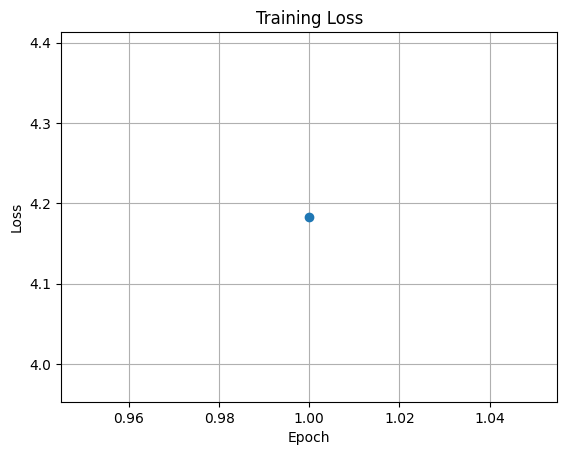

In [26]:
"""
Load dataset + vocab
Khởi tạo Encoder–Decoder LSTM
Teacher Forcing
CrossEntropyLoss (ignore <pad>)
Lưu checkpoint .pth
In loss + plot biểu đồ

✅ Điểm nổi bật:
Dataset & vocab được load từ .pt và .pkl → tiết kiệm thời gian tokenization và build vocab
Encoder–Decoder LSTM cơ bản, không dùng attention
Teacher Forcing tùy chỉnh với TEACHER_FORCING_RATIO
CrossEntropyLoss ignore <pad>
Checkpoint .pth lưu mỗi epoch
Plot loss sau khi train
"""

# src/train.py
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from src.data import load_dataset, load_vocab, MyCollate, TranslationDataset  # import from package src.data

# =============================
# 1. Hyperparameters
# =============================
BATCH_SIZE = 32
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LEARNING_RATE = 0.001
NUM_EPOCHS = 1
TEACHER_FORCING_RATIO = 0.5
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================
# 2. Load dataset + vocab
# =============================
train_dataset = load_dataset("data/train_dataset.pt")
src_vocab = load_vocab("data/vocab_en.pkl")
trg_vocab = load_vocab("data/vocab_fr.pkl")

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                          collate_fn=MyCollate(train_dataset.pad_idx))

PAD_IDX = src_vocab.stoi["<pad>"]

# =============================
# 3. Encoder
# =============================
class Encoder(nn.Module):
    def __init__(self, input_dim, embed_size, hidden_size, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embed_size, padding_idx=PAD_IDX)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, (hidden, cell) = self.lstm(packed)
        output, _ = pad_packed_sequence(packed_out, batch_first=True, padding_value=PAD_IDX)
        return hidden, cell

# =============================
# 4. Decoder
# =============================
class Decoder(nn.Module):
    def __init__(self, output_dim, embed_size, hidden_size, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(output_dim, embed_size, padding_idx=PAD_IDX)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_dim)

    def forward(self, x, hidden, cell):
        x = x.unsqueeze(1)  # (batch, 1)
        embedded = self.embedding(x)
        outputs, (hidden, cell) = self.lstm(embedded, (hidden, cell))
        predictions = self.fc(outputs.squeeze(1))
        return predictions, hidden, cell

# =============================
# 5. Seq2Seq
# =============================
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        batch_size = src.shape[0]
        trg_len = trg.shape[1]
        trg_vocab_size = len(trg_vocab.stoi)

        outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(self.device)

         # =============================
        # Tính độ dài thực tế để pack
        # =============================
        lengths = (src != PAD_IDX).sum(dim=1)
        hidden, cell = self.encoder(src, lengths)
        input = trg[:,0]  # <sos>

        for t in range(1, trg_len):
            output, hidden, cell = self.decoder(input, hidden, cell)
            outputs[:,t,:] = output
            teacher_force = torch.rand(1).item() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input = trg[:,t] if teacher_force else top1

        return outputs

# =============================
# 6. Initialize model + optimizer + loss
# =============================
encoder = Encoder(len(src_vocab.stoi), EMBED_SIZE, HIDDEN_SIZE, NUM_LAYERS).to(DEVICE)
decoder = Decoder(len(trg_vocab.stoi), EMBED_SIZE, HIDDEN_SIZE, NUM_LAYERS).to(DEVICE)
model = Seq2Seq(encoder, decoder, DEVICE).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

# =============================
# 7. Training loop
# =============================
loss_list = []

for epoch in range(NUM_EPOCHS):
    model.train()
    epoch_loss = 0
    for src, trg in train_loader:
        src, trg = src.to(DEVICE), trg.to(DEVICE)
        optimizer.zero_grad()
        output = model(src, trg, teacher_forcing_ratio=TEACHER_FORCING_RATIO)

        # reshape for loss: (batch*seq_len, vocab_size)
        output_dim = output.shape[-1]
        output = output[:,1:,:].reshape(-1, output_dim)
        trg = trg[:,1:].reshape(-1)
        loss = criterion(output, trg)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] Loss: {avg_loss:.4f}")

    # save checkpoint
    torch.save(model.state_dict(), f"checkpoints/seq2seq_epoch{epoch+1}.pth")

# =============================
# 8. Plot loss
# =============================
plt.plot(range(1, NUM_EPOCHS+1), loss_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

# =============================
# 9. Translation (Inference)
# =============================

# 👉 Thay vì torchtext, ta dùng NLTK để tính BLEU
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def translate_sentence(sentence, src_vocab, trg_vocab, model, device, max_len=50):
    model.eval()
    # dùng spaCy tokenizer giống lúc train
    tokens = ["<sos>"] + [tok.text.lower() for tok in spacy_en.tokenizer(sentence)] + ["<eos>"]
    src_indexes = [src_vocab.stoi.get(tok, src_vocab.stoi["<unk>"]) for tok in tokens]
    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)

    lengths = (src_tensor != src_vocab.stoi["<pad>"]).sum(dim=1)

    with torch.no_grad():
        hidden, cell = model.encoder(src_tensor, lengths)

    trg_indexes = [trg_vocab.stoi["<sos>"]]

    for i in range(max_len):
        trg_tensor = torch.LongTensor([trg_indexes[-1]]).to(device)
        with torch.no_grad():
            output, hidden, cell = model.decoder(trg_tensor, hidden, cell)
            pred_token = output.argmax(1).item()
        trg_indexes.append(pred_token)
        if pred_token == trg_vocab.stoi["<eos>"]:
            break

    trg_tokens = [trg_vocab.itos[i] for i in trg_indexes]
    return " ".join(trg_tokens[1:-1])


# =============================
# 10. Evaluation – BLEU Score (NLTK)
# =============================

def calculate_bleu_score(dataloader, model, src_vocab, trg_vocab, device, n_samples=50):
    """
    Tính BLEU score trung bình trên n câu test ngẫu nhiên
    """
    model.eval()
    preds, targets = [], []
    count = 0

    smoothie = SmoothingFunction().method4  # làm mượt BLEU để tránh 0 khi câu ngắn

    for src, trg in dataloader:
        src, trg = src.to(device), trg.to(device)
        for i in range(src.shape[0]):
            src_tokens = [src_vocab.itos[idx] for idx in src[i].cpu().numpy()
                          if idx not in [src_vocab.stoi["<pad>"], src_vocab.stoi["<sos>"], src_vocab.stoi["<eos>"]]]
            trg_tokens = [trg_vocab.itos[idx] for idx in trg[i].cpu().numpy()
                          if idx not in [trg_vocab.stoi["<pad>"], trg_vocab.stoi["<sos>"], trg_vocab.stoi["<eos>"]]]
            src_sentence = " ".join(src_tokens)
            pred = translate_sentence(src_sentence, src_vocab, trg_vocab, model, device)
            preds.append(pred.split())
            targets.append([trg_tokens])
            count += 1
            if count >= n_samples:
                break
        if count >= n_samples:
            break

    # Tính BLEU trung bình
    scores = [
        sentence_bleu(ref, pred, smoothing_function=smoothie)
        for pred, ref in zip(preds, targets)
    ]
    bleu = sum(scores) / len(scores)
    print(f"BLEU score (trên {n_samples} mẫu): {bleu*100:.2f}")
    return bleu


In [27]:
example = "Two young, White males are outside near many bushes."
translated = translate_sentence(example, src_vocab, trg_vocab, model, DEVICE)
print(f"\n🔹 English: {example}")
print(f"🔸 French: {translated}\n")


NameError: name 'spacy_en' is not defined

In [15]:
!pip uninstall torch torchtext -y
!pip install torch==2.2.2 torchtext==0.17.2


Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchtext 0.18.0
Uninstalling torchtext-0.18.0:
  Successfully uninstalled torchtext-0.18.0


You can safely remove it manually.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/198.5 MB ? eta -:--:--
   ---------------------------------------- 0.8/198.5 MB 5.6 MB/s eta 0:00:36
    --------------------------------------- 3.4/198.5 MB 10.1 MB/s eta 0:00:20
    --------------------------------------- 4.5/198.5 MB 8.1 MB/s eta 0:00:24
   - -------------------------------------- 6.6/198.5 MB 8.6 MB/s eta 0:00:23
   - -------------------------------------- 8.4/198.5 MB 8.7 MB/s eta 0:00:22
   - -------------------------------------- 9.7/198.5 MB 8.2 MB/s eta 0:00:24
   -- ------------------------------------- 11.8/198.5 MB 8.4 MB/s eta 0:00:23
   -- ------------------------------------- 13.9/198.5 MB 8.6 MB/s eta 0:00:22
   --- ------------------------------------ 16.0/198.5 MB 8.7 MB/s eta 0:00:22
   --- ------------------------------------ 17.8/198.5 MB 8.8 MB/s eta 0:00:21
   ---- ----------------------------------- 19.9/198.5 MB 8.8 MB/s


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\doqua\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
